# Project 3, Alexander Kyrkjeeide, Data Science, Fall 2023

In [1]:
pip install matplotlib pandas numpy seaborn


Note: you may need to restart the kernel to use updated packages.


## 1. 
## Create a simple plot using plt.plot(). 
## Plot a single Python list [3,7,8,9,12].

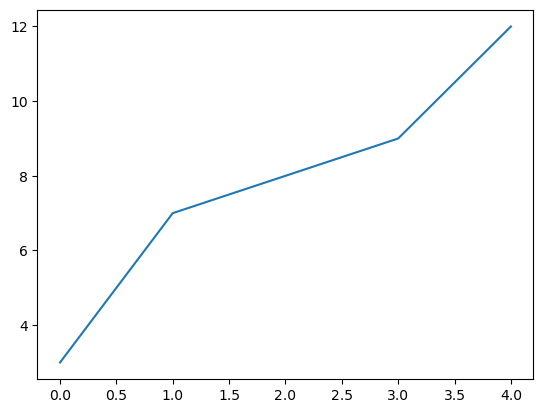

In [2]:
import matplotlib.pyplot as plt

data = [3, 7, 8, 9, 12]
plt.plot(data)
plt.show()

## 2. 
## Create two lists, one called x, one called y, each with 5 numbers in them.
### a.	Plot them using plt.plot().
### b.	Create a plot using plt.subplots() and then add x & y on the axes.

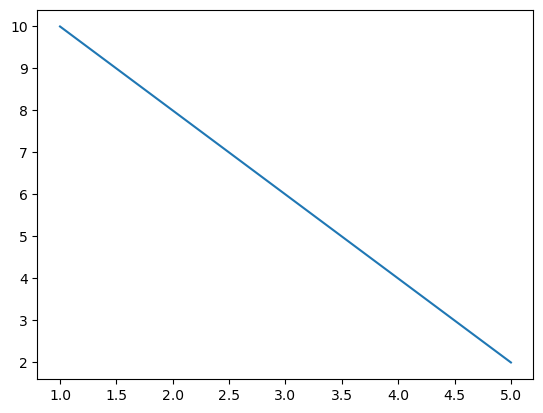

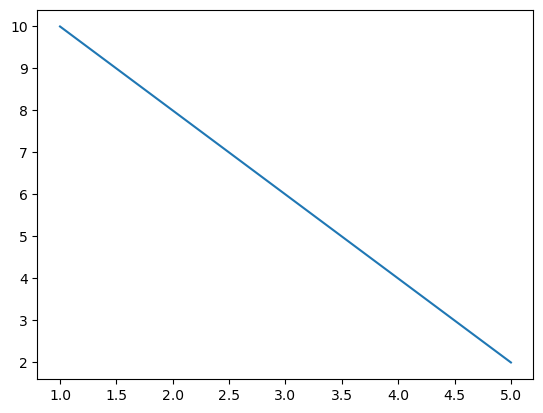

In [3]:
import numpy as np

x = [1, 2, 3, 4, 5]
y = [10, 8, 6, 4, 2]

plt.plot(x, y)
plt.show()

fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

## 3.	Create an 1D array of 100 evenly spaced numbers between 0 and 100 using NumPy and save it to variable X.
### a.	Create a plot using plt.subplots() and plot X versus X2
### b.	Create a scatter plot of X versus the exponential of X (np.exp(X))




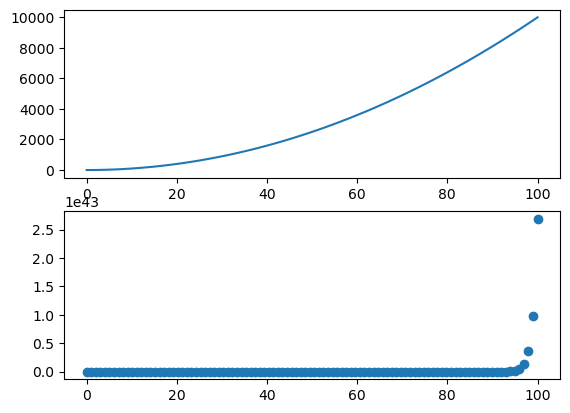

In [4]:
X = np.linspace(0, 100, 100)
X2 = X**2

fig, ax = plt.subplots(2)
ax[0].plot(X, X2)
ax[1].scatter(X, np.exp(X))
plt.show()

## 4.	Import car-sales.csv  into a DataFrame called car_sales and view.
### a.	Try to plot the 'Price' column using the plot() function
### b.	Try to plot the ''Odometer (KM)” column using the plot() function
### Comment on why one doesn't work while another do?


In [5]:
import pandas as pd

car_sales = pd.read_csv("car-sales.csv")
print(car_sales.head())

     Make Colour  Odometer (KM)  Doors    Price
0  Toyota  White         150043      4   $4,000
1   Honda    Red          87899      4   $5,000
2  Toyota   Blue          32549      3   $7,000
3     BMW  Black          11179      5  $22,000
4  Nissan  White         213095      4   $3,500


In [7]:
car_sales['Price'] = car_sales['Price'].str.replace('[\$\,]', '', regex=True).astype('int64') # 5. Remove all symbols and convert

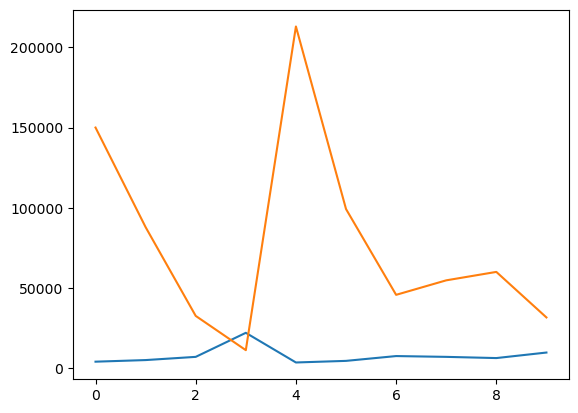

In [8]:
car_sales['Price'].plot()
car_sales['Odometer (KM)'].plot()
plt.show()

In [10]:
print(car_sales.head())

     Make Colour  Odometer (KM)  Doors  Price
0  Toyota  White         150043      4   4000
1   Honda    Red          87899      4   5000
2  Toyota   Blue          32549      3   7000
3     BMW  Black          11179      5  22000
4  Nissan  White         213095      4   3500


In [11]:
#Comment: The issue is due to its data type or formatting. Not registering as numeric data 

## 6.	Add a column called 'Total Sales' to car_sales which cumulatively adds the 'Price' column look up the cumsum() function.

In [12]:
car_sales['Total Sales'] = car_sales['Price'].cumsum()

## 7.	Add a column called 'Sale Date' which lists a series of successive dates starting from today (your today). Check out “date_range” function and keep the periods=len(car_sales).

In [14]:
today = pd.Timestamp.now().date()
car_sales['Sale Date'] = pd.date_range(start=today, periods=len(car_sales))
print(car_sales.head())

     Make Colour  Odometer (KM)  Doors  Price  Total Sales  Sale Date
0  Toyota  White         150043      4   4000         4000 2023-10-06
1   Honda    Red          87899      4   5000         9000 2023-10-07
2  Toyota   Blue          32549      3   7000        16000 2023-10-08
3     BMW  Black          11179      5  22000        38000 2023-10-09
4  Nissan  White         213095      4   3500        41500 2023-10-10


## 8.Use the matplotlib line plot function to plot the 'Price' column versus the 'Total Sales' column (Give proper title and appropriate labels.

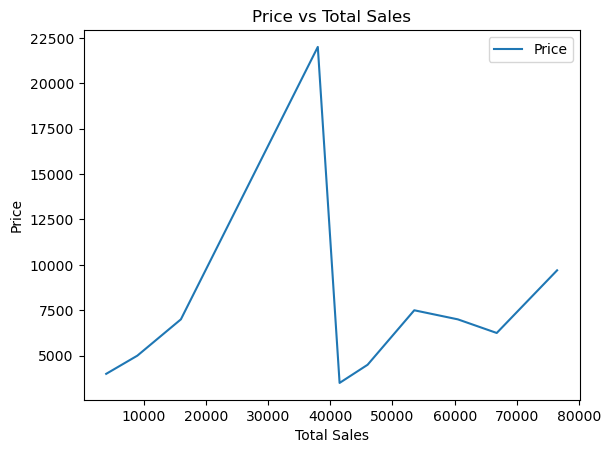

In [16]:
plt.plot(car_sales['Total Sales'], car_sales['Price'], label='Price')
plt.title('Price vs Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Price')
plt.legend()
plt.show()

## 9.	Create a matplotlib scatter plot of the 'Odometer (KM)' vs 'Price' column.

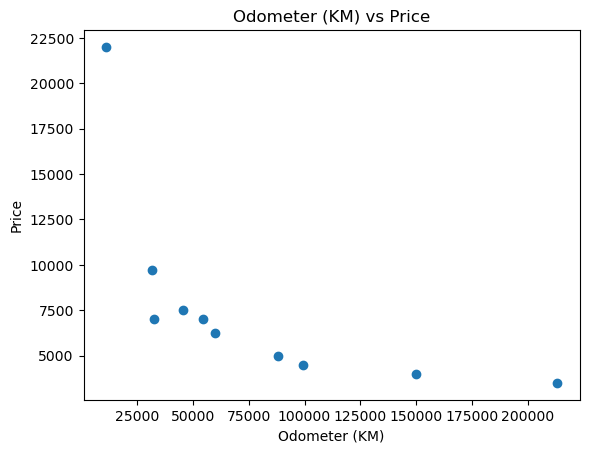

In [17]:
plt.scatter(car_sales['Odometer (KM)'], car_sales['Price'])
plt.title('Odometer (KM) vs Price')
plt.xlabel('Odometer (KM)')
plt.ylabel('Price')
plt.show()

## 10.	Create a matplotlib bar graph of the 'Make' vs 'Odometer (KM)' columns

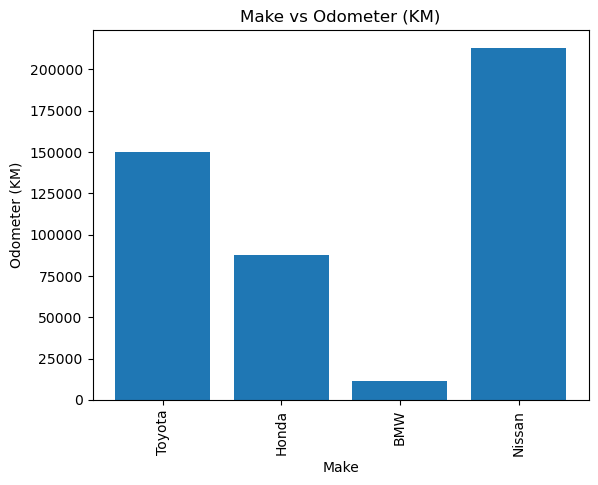

In [18]:
plt.bar(car_sales['Make'], car_sales['Odometer (KM)'])
plt.xticks(rotation=90)
plt.title('Make vs Odometer (KM)')
plt.xlabel('Make')
plt.ylabel('Odometer (KM)')
plt.show()

## 11. Create a histogram of the 'Make' column

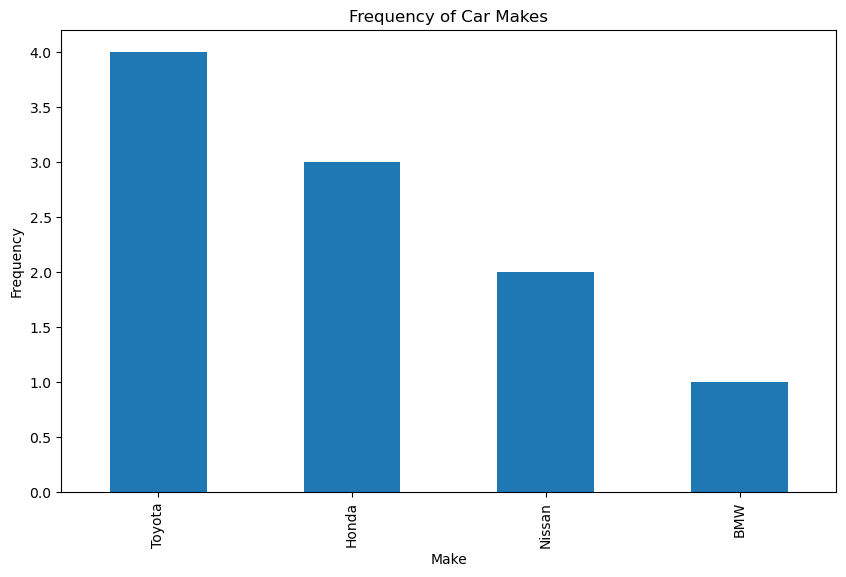

In [19]:
plt.figure(figsize=(10, 6))  
car_sales['Make'].value_counts().plot(kind='bar')
plt.title('Frequency of Car Makes')
plt.xlabel('Make')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  
plt.show()

## 12.	Create a subplot of multiple plots ( step 8,9,10,11).

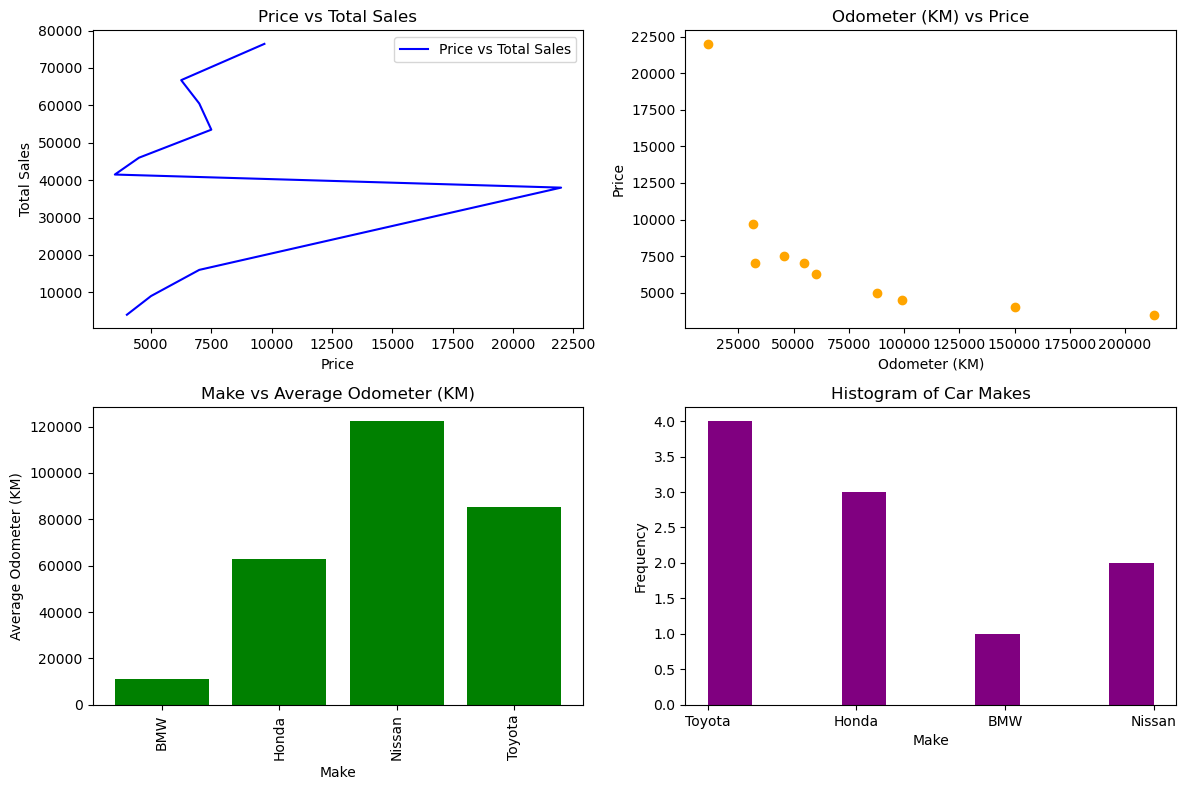

In [22]:
# Create subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Subplot 1: Price vs Total Sales
axs[0, 0].plot(car_sales['Price'], car_sales['Total Sales'], label='Price vs Total Sales', color='blue')
axs[0, 0].set_title('Price vs Total Sales')
axs[0, 0].set_xlabel('Price')
axs[0, 0].set_ylabel('Total Sales')
axs[0, 0].legend()

# Subplot 2: Odometer (KM) vs Price
axs[0, 1].scatter(car_sales['Odometer (KM)'], car_sales['Price'], color='orange')
axs[0, 1].set_title('Odometer (KM) vs Price')
axs[0, 1].set_xlabel('Odometer (KM)')
axs[0, 1].set_ylabel('Price')

# Subplot 3: Make vs Average Odometer (KM)
make_odometer = car_sales.groupby('Make')['Odometer (KM)'].mean()
axs[1, 0].bar(make_odometer.index, make_odometer.values, color='green')
axs[1, 0].set_title('Make vs Average Odometer (KM)')
axs[1, 0].set_xlabel('Make')
axs[1, 0].set_ylabel('Average Odometer (KM)')
axs[1, 0].tick_params(axis='x', rotation=90)

# Subplot 4: Histogram of the 'Make' column
axs[1, 1].hist(car_sales['Make'], color='purple', bins=10)
axs[1, 1].set_title('Histogram of Car Makes')
axs[1, 1].set_xlabel('Make')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 13. Create a box plot of Colour and Total Sales using seaborn plot

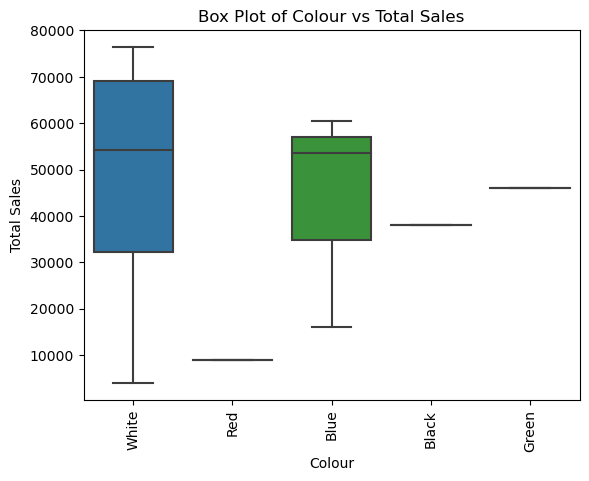

In [23]:
import seaborn as sns

sns.boxplot(x='Colour', y='Total Sales', data=car_sales)
plt.xticks(rotation=90)
plt.title('Box Plot of Colour vs Total Sales')
plt.xlabel('Colour')
plt.ylabel('Total Sales')
plt.show()

## 14.	Find out the relationship between "Total Sales" and "Odometer (KM)" using linear regression with no error bar and car make will determine the hue

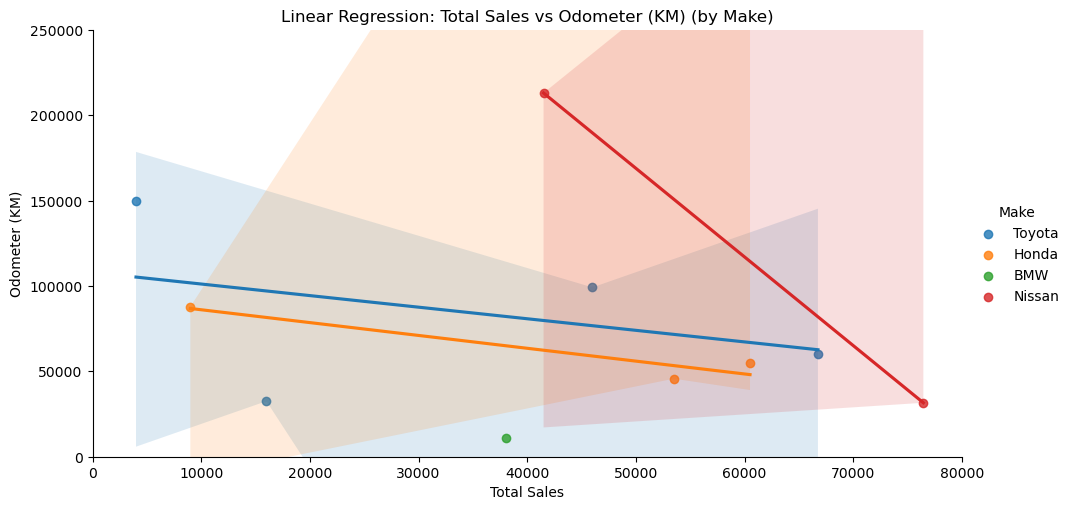

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating the linear regression plot with custom aspect ratio (it woudn't fit the frame)
sns.lmplot(x='Total Sales', y='Odometer (KM)', data=car_sales, hue='Make', fit_reg=True, aspect=2)

# Setting custom x-axis and y-axis limits
plt.xlim(0, 80000)
plt.ylim(0, 250000)  

plt.title('Linear Regression: Total Sales vs Odometer (KM) (by Make)')
plt.xlabel('Total Sales')
plt.ylabel('Odometer (KM)')
plt.show()

## 15.	Draw pair plot for all possible combinations.

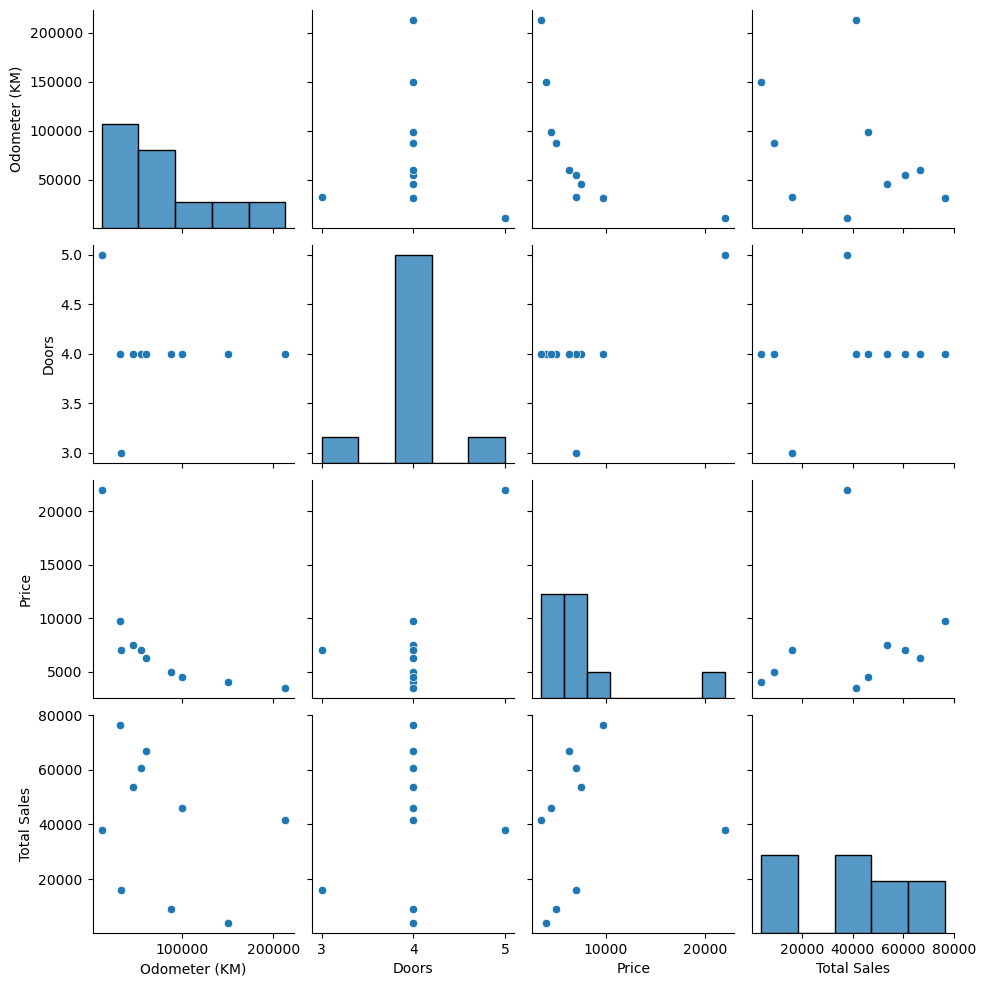

In [31]:
sns.pairplot(car_sales)
plt.show()

## 16.	Find out Pearson correlation between 'Total Sales','Price','Odometer (KM)'. Comment on the correlation 

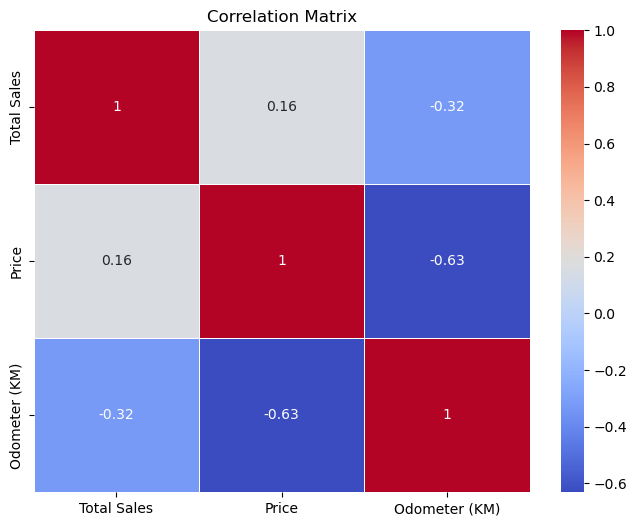

In [33]:
correlation_matrix = car_sales[['Total Sales', 'Price', 'Odometer (KM)']].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [34]:
correlation_matrix = car_sales[['Total Sales', 'Price', 'Odometer (KM)']].corr()
print(correlation_matrix)

               Total Sales     Price  Odometer (KM)
Total Sales       1.000000  0.164732      -0.321634
Price             0.164732  1.000000      -0.631781
Odometer (KM)    -0.321634 -0.631781       1.000000


In [ ]:
#Comment: The provided correlation coefficients indicate:

#A weak positive correlation (0.1647) between 'Total Sales' and 'Price.'
#A weak negative correlation (-0.3216) between 'Total Sales' and 'Odometer (KM).'
#A moderate negative correlation (-0.6318) between 'Price' and 'Odometer (KM).'